# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [38]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [39]:
# 데이터 로드
data = pd.read_csv("abalone_train.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [40]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [41]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [42]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [43]:
#릿지모델 생성 및 훈련
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train, y_train)

#예측값 구하기
y_pred_ridge = ridge_model.predict(X_val)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age_pred_ridge = y_pred_ridge + 1.5

#MSE와 RMSE구하기
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("릿지 회귀 모델 평가 (alpha=0.3)")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")

릿지 회귀 모델 평가 (alpha=0.3)
MSE: 4.03
RMSE: 2.01


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [44]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [45]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)

    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    rmse = np.sqrt(-np.mean(mse_scores))  # 평균 RMSE 계산 (제곱근)
    print(f"alpha={alpha}: 평균 RMSE={rmse:.4f}")

alpha=0: 평균 RMSE=1.9907
alpha=0.1: 평균 RMSE=1.9906
alpha=1: 평균 RMSE=1.9907
alpha=10: 평균 RMSE=1.9974
alpha=100: 평균 RMSE=2.1021


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [46]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [49]:
#모델 생성 및 훈련
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

#예측값 구하기
y_pred_xgb = xgb_model.predict(X_val)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age_pred_xgb = y_pred_xgb + 1.5

#MSE와 RMSE 구하기
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("\nXGBRegressor 모델 평가:")
print(f"MSE (Rings 예측): {mse_xgb:.4f}")
print(f"RMSE (Rings 예측): {rmse_xgb:.4f}")


XGBRegressor 모델 평가:
MSE (Rings 예측): 3.5341
RMSE (Rings 예측): 1.8799


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

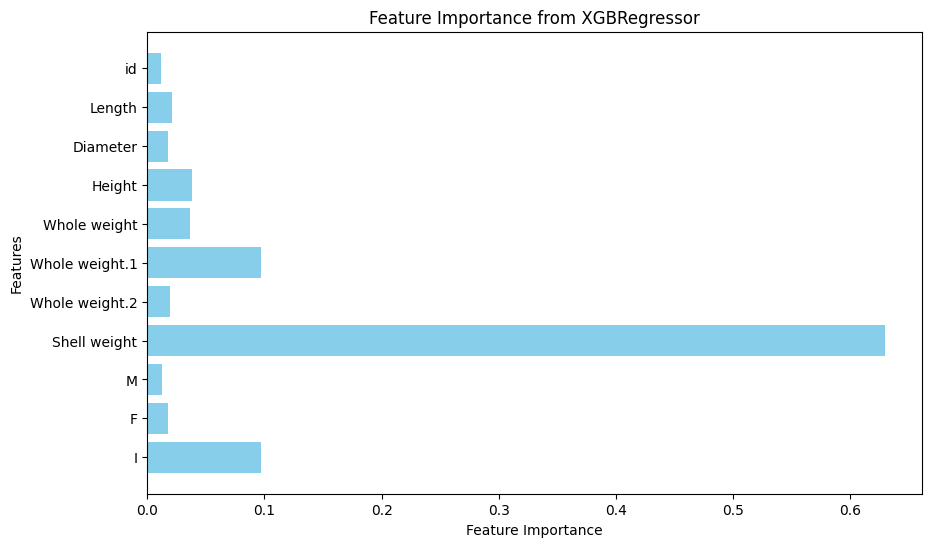

In [51]:
import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
from xgboost import plot_importance

# 특성 중요도 가져오기
feature_importance = xgb_model.feature_importances_

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(data.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from XGBRegressor")
plt.gca().invert_yaxis()  # 중요도가 높은 특성이 위로 오도록 정렬
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [52]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [56]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [57]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [62]:
# 로지스틱 회귀 모델 생성 (다항 분류)
log_reg = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')

# 모델 훈련
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [60]:
#기울기
log_reg.coef_

array([[ 0.37946548,  0.54383757,  0.60852204, -0.25903849, -0.00302671,
         0.25020399,  0.76003448,  0.08721204,  0.14235223,  0.17019327,
        -0.01727888,  0.51523557,  0.00863   ],
       [-0.58218279, -0.9098658 , -0.68960255,  0.14706583, -0.04136857,
         0.31187144,  0.15182104,  0.03033223,  0.39822396, -0.91016565,
         0.32987182,  0.13569366, -0.00764336],
       [ 0.20271732,  0.36602823,  0.0810805 ,  0.11197266,  0.04439529,
        -0.56207543, -0.91185552, -0.11754427, -0.54057619,  0.73997238,
        -0.31259294, -0.65092923, -0.00098664]])

In [61]:
#절편
log_reg.intercept_

array([-12.78848241,  20.80866584,  -8.02018344])

3-3) 모델의 정확도를 구하세요.

In [63]:
#모델의 예측값 구하기
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(x_test)
print(y_pred)

#모델의 정확도 구하기
accuracy = accuracy_score(y_test, y_pred)
print(f"모델의 정확도: {accuracy:.4f}")

[2 1 2 1 1 2 0 2 2 1 2 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 0 0 0 0 0 1 1 2 1 2
 0 1 1 2 2 0 0 1 0 0 1 0 1 1 2 2 1]
모델의 정확도: 0.9630
